In [ ]:
import pandas as pd

df=pd.read_csv("rockmusic_2147239.csv")
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   object 
 2   artist            5484 non-null   object 
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
a=df.corr()
a.style.text_gradient(cmap="Dark2")

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
index,1.000000,-0.001033,-0.020613,0.165672,-0.047728,-0.386874,-0.056157,-0.073477,-0.056157,0.070377,0.001021,0.022695,0.021272,0.050855,0.042186,0.019620,-0.014239,-0.039501
name,-0.001033,1.000000,0.000921,0.010811,0.013942,0.006225,-0.005092,-0.011339,-0.005092,-0.001250,-0.003752,0.023421,0.003252,0.002196,-0.019935,0.010808,0.002370,-0.018955
artist,-0.020613,0.000921,1.000000,0.028908,-0.061020,-0.059490,-0.015624,-0.011812,-0.015624,0.014250,0.041001,-0.032017,0.007299,-0.006799,-0.016191,0.014234,0.009930,0.028825
release_date,0.165672,0.010811,0.028908,1.000000,0.056641,-0.282614,-0.083073,-0.360184,-0.083073,0.288541,0.023215,0.030631,0.084054,0.414275,0.089379,0.020801,0.025215,-0.215172
length,-0.047728,0.013942,-0.061020,0.056641,1.000000,0.023665,-0.116905,-0.055241,-0.116905,-0.045376,0.228365,0.011435,0.010616,-0.091621,-0.093946,-0.045716,0.006592,-0.286435
popularity,-0.386874,0.006225,-0.059490,-0.282614,0.023665,1.000000,0.114804,0.088253,0.114804,-0.081577,-0.091788,0.032483,-0.115119,-0.012989,-0.071142,-0.030477,0.012332,0.031250
danceability,-0.056157,-0.005092,-0.015624,-0.083073,-0.116905,0.114804,1.000000,0.239176,1.000000,-0.139621,-0.079404,0.021468,-0.197141,-0.141048,-0.150252,-0.245067,0.115481,0.501910
acousticness,-0.073477,-0.011339,-0.011812,-0.360184,-0.055241,0.088253,0.239176,1.000000,0.239176,-0.565125,-0.156684,-0.044054,-0.038294,-0.475641,-0.181739,-0.140975,-0.074757,0.131323
danceability.1,-0.056157,-0.005092,-0.015624,-0.083073,-0.116905,0.114804,1.000000,0.239176,1.000000,-0.139621,-0.079404,0.021468,-0.197141,-0.141048,-0.150252,-0.245067,0.115481,0.501910
energy,0.070377,-0.001250,0.014250,0.288541,-0.045376,-0.081577,-0.139621,-0.565125,-0.139621,1.000000,0.019461,0.056301,0.116208,0.732455,0.400515,0.211958,0.139394,0.140694


In [ ]:
df.head()

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,3931,942,35,3827,74,363,101,363,752,925,1,599,3630,332,2084,3,708
1,1,4069,772,15,4639,78,199,2350,199,186,1476,9,609,684,107,321,3,185
2,2,610,1045,19,4316,74,253,2085,253,243,0,0,736,1252,304,4010,3,216
3,3,2201,704,15,995,77,408,2602,408,116,2284,0,530,618,20,90,3,157
4,4,8,1516,9,1949,77,584,1484,584,703,1941,2,621,2061,106,3613,3,919


In [ ]:

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['index','name','artist', 'release_date','length','popularity','danceability','acousticness','danceability.1','energy','instrumentalness','key','liveness','loudness','speechiness','tempo','time_signature', 'valence']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['artist']=labelencoder.fit_transform(df['artist'])
df.head(1)
x= df.iloc[:, [9,13]].values  
y= df.iloc[:, 5].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
import numpy as nm
#features = nm.array([[4,5]])
features = nm.array([[752,4557]])
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 

# using inputs to predict the output
classifier.fit(x_train, y_train)  
prediction = classifier.predict(features)

print("Popularity: {}".format(prediction))


Popularity: [36]


In [ ]:
x= df.iloc[:,[4]].values  
y= df.iloc[:,[5]].values  


In [ ]:
x.shape

(5484, 1)

In [ ]:
y.shape

(5484, 1)

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
a_train, a_test, b_train, b_test= train_test_split(x,y, test_size= 0.50, random_state=42)  


In [ ]:
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(a_train, b_train) 


LinearRegression()

In [ ]:
#Prediction of Test and Training set result  
a_pred= regressor.predict(a_test)  
b_pred= regressor.predict(a_train)  



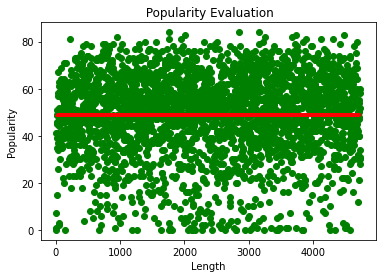

In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp  

mtp.scatter(a_train, b_train, color="green")   
mtp.plot(a_train, a_pred, color="red")    
mtp.title(" Popularity Evaluation")  
mtp.xlabel("Length")  
mtp.ylabel("Popularity")  
mtp.show()


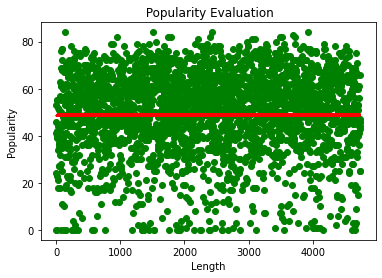

In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp  

mtp.scatter(a_test, b_test, color="green")   
mtp.plot(a_train, a_pred, color="red")    
mtp.title(" Popularity Evaluation")  
mtp.xlabel("Length")  
mtp.ylabel("Popularity")  
mtp.show()